In [3]:
import random
import cv2
from matplotlib import pyplot as plt
import albumentations as A

In [59]:
BOX_COLOR=(255,0,0)
TEXT_COLOR=(255,255,255)
def visualize_bbox(img,bbox,class_name,color=BOX_COLOR,thickness=2):
    x_min,y_min,w,h=bbox
    x_min,x_max,y_min,y_max=int(x_min),int(x_min+w),int(y_min),int(y_min+h)
    cv2.rectangle(img, (x_min,y_min), (x_max, y_max), color=color, thickness=thickness)
    ((text_width,text_height),baseline)=cv2.getTextSize(class_name,cv2.FONT_HERSHEY_SIMPLEX,0.35,1)# 正常大小无衬线字体,返回三个值，bbox的高、宽以及基线
    # 绘制类标记所在的方框
    #cv2.rectangle(img,(x_min,y_min-int(1.3*text_height)),(x_min+text_width,y_min),BOX_COLOR,-1)
    cv2.rectangle(img,(x_min,y_min-int(baseline+text_height)),(x_min+text_width,y_min),BOX_COLOR,-1)
    # 将类标记写入方框
    cv2.putText(
        img,
        text=class_name,
        org=(x_min,y_min-baseline),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35,
        color=TEXT_COLOR,
        lineType=cv2.LINE_AA,
    )
    return img

def visualize(image,bboxes,category_ids,category_id_to_name):
    img=image.copy()
    for bbox,category_id in zip(bboxes,category_id_to_name):
        class_name=category_id_to_name[category_id]
        img=visualize_bbox(img,bbox,class_name)
    # 设置画布大小
    plt.figure(figsize=(12,12))
    # 取消坐标轴
    plt.axis('off')
    plt.imshow(img)

In [81]:
image=cv2.imread(r'd:\VSCode\package\albumentation\albumentations_examples-master\notebooks\images\000000386298.jpg')
#image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [23]:
bboxes=[[5.66,138.95,147.09,164.88],[366.7,80.84,132.8,181.84]]
category_ids=[17,18]
category_id_to_name={17:'cat',18:'dog'}

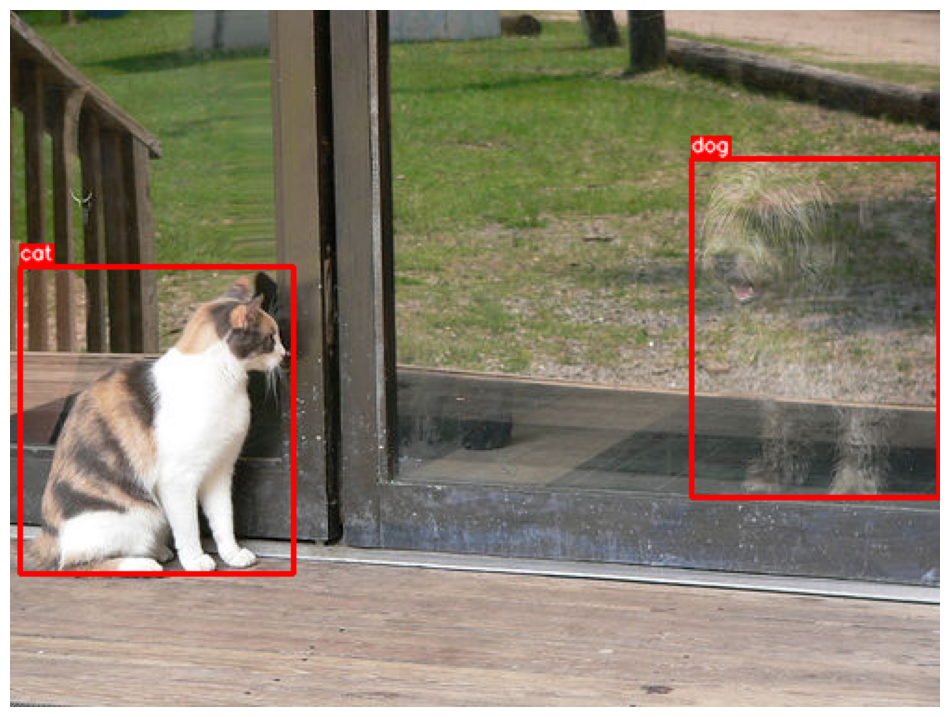

In [61]:
visualize(image,bboxes,category_ids,category_id_to_name)

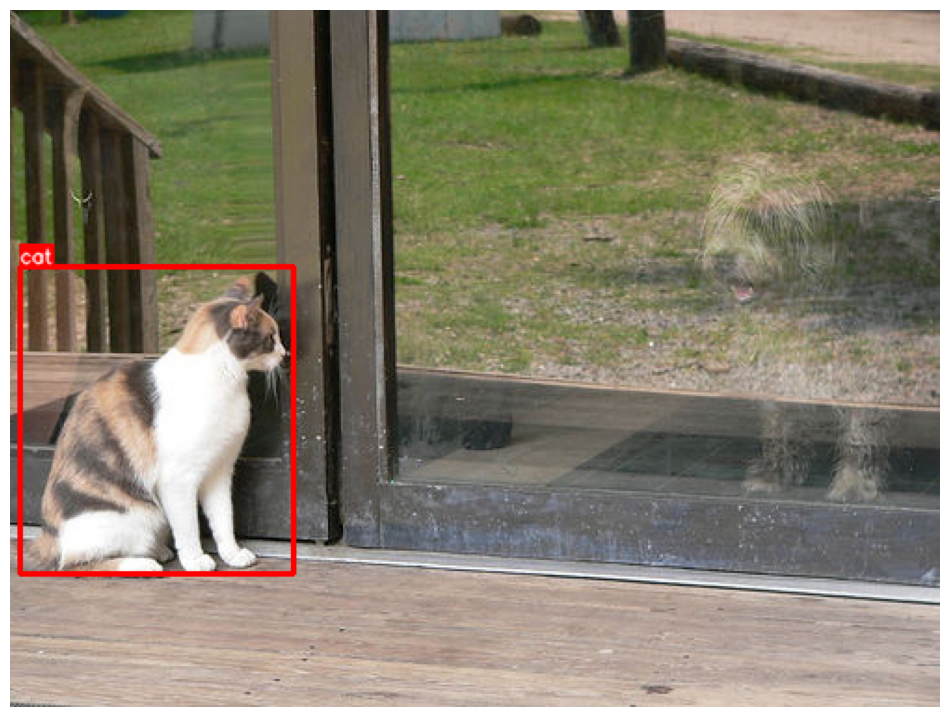

In [58]:
visualize_bbox(image,[5.66,138.95,147.09,164.88],'cat')
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.imshow(image)

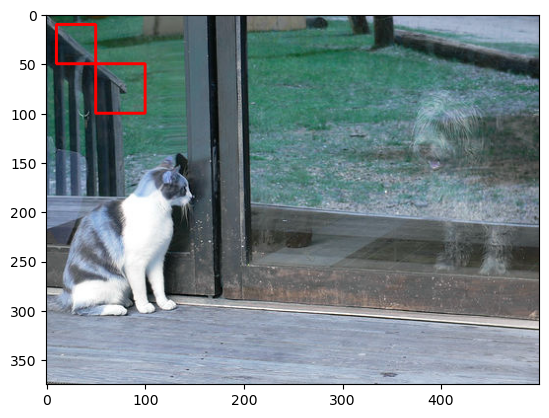

In [90]:
x_min,x_max,y_min,y_max=[5.66,138.95,147.09,164.88]
thickness=2
i=cv2.rectangle(image, (100,100), (50, 50), BOX_COLOR, thickness)
plt.imshow(i)

In [2]:
import random
import cv2
from matplotlib import pyplot as plt
import albumentations as A

In [21]:
def visualize(image,mask,original_image=None,original_mask=None):
    fontsize=18
    if original_image is None and original_mask is None:
        f,ax=plt.subplots(2,1,figsize=(8,8))
        ax[0].imshow(image)
        ax[1].imshow(mask)
    else:
        f,ax=plt.subplots(2,2,figsize=(8,8))
        ax[0,0].imshow(original_image)
        ax[0,0].set_title('original image',fontsize=fontsize)
        ax[1,0].imshow(original_mask)
        ax[1,0].set_title('original mask',fontsize=fontsize)
        ax[0,1].imshow(image)
        ax[0,1].set_title('Transformed image',fontsize=fontsize)
        ax[1,1].imshow(mask)
        ax[1,1].set_title('Transformed mask',fontsize=fontsize)
            

In [22]:
image=cv2.imread(r"D:\VSCode\package\albumentation\albumentations_examples-master\notebooks\images\kaggle_salt\0fea4b5049_image.png")
mask=cv2.imread(r"D:\VSCode\package\albumentation\albumentations_examples-master\notebooks\images\kaggle_salt\0fea4b5049.png",cv2.IMREAD_GRAYSCALE)

(128, 128, 3) (128, 128)


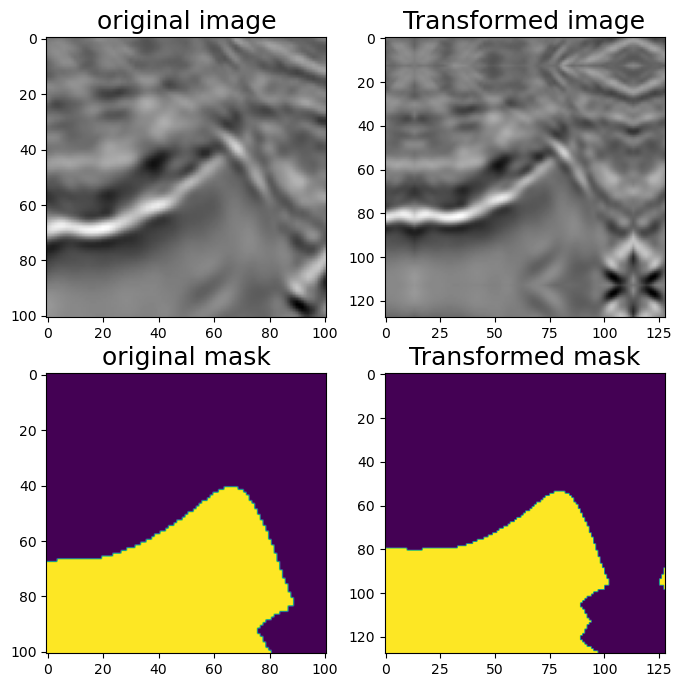

In [32]:
aug=A.PadIfNeeded(min_height=128,min_width=128,p=1)
augmented=aug(image=image,mask=mask)
image_padded=augmented['image']
mask_padded=augmented['mask']
print(image_padded.shape,mask_padded.shape)
visualize(image_padded,mask_padded,original_image=image,original_mask=mask)

In [34]:
import random

In [56]:
KEYPOINT_COLOR=(0,255,0)
def vis_keypoints(image,keypoints,color=KEYPOINT_COLOR,diameter=10):
    image=image.copy()
    for (x,y) in keypoints:
        # -1表示要填充完整
        cv2.circle(image,(int(x),int(y)),diameter,(0,255,0),-1)
    plt.figure(figsize=(8,8))
    plt.axis('off')
    plt.imshow(image)

In [36]:
image=cv2.imread(r'D:\VSCode\package\albumentation\albumentations_examples-master\notebooks\images\keypoints_image.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [38]:
keypoints = [
    (100, 100),
    (720, 410),
    (1100, 400),
    (1700, 30), 
    (300, 650),
    (1570, 590),
    (560, 800),
    (1300, 750), 
    (900, 1000),
    (910, 780),
    (670, 670),
    (830, 670), 
    (1000, 670),
    (1150, 670),
    (820, 900),
    (1000, 900),
]

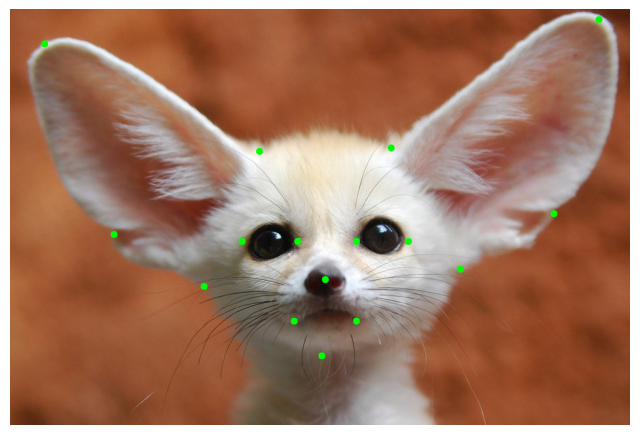

In [55]:
vis_keypoints(image, keypoints)

In [30]:
from PIL import Image
import albumentations as A
import numpy as np
aug = A.Compose([
    # 水平翻转
    A.HorizontalFlip(p=0.5),
    # 随机使用平移、缩放、旋转
    A.ShiftScaleRotate(p=0.5),
    # A.RandomBrightnessContrast(brightness_limit=(-0.1, 0.1), contrast_limit=(-0.1, 0.1), p=0.5),
    A.Normalize(mean=[0.], std=[1.]),
    # 将图片和mask转换为torch.tensor形式
    #ToTensorV2()
])
img = "D:\VSCode\work\frames\58168_003392_Endzone.mp4_0003.jpg"
#np.array(img)
#aug(image=img)

im = Image.open(r"D:\VSCode\work\frames\58168_003392_Endzone.mp4_0003.jpg")
im2 = np.array(im)
aug(image=im2).keys()

dict_keys(['image'])